#### Course name: Introduction to probability theory
#### Project name: YouTube Trending Videos Analysis
#### Team members: Emad Armiti, Ahmad Obeid and Rama Salahat
#### Date: 13/5/2019

<img src="https://images2.alphacoders.com/795/795968.png" alt="Alt text that describes the graphic" title="Title text" />

<div class="alert alert-block alert-info">
<b>Summary</b><br/>
    The purpose of this project is to figure out what the key factors are that make a trending YouTube video. Ten data sets were given from ten different countries. In our analysis the United States data set was used as our case study. In order to thoroughly analyze the data, we first gathered the main analyzing packages needed. Then we read the US data set and cleaned the data in the most efficient way possible. Finally, we divided our analysis procedure to four stages: Description of numerical columns and non-numeric columns, Analyzing video titles, Correlation between data set variables, and finally Analyzing video features and comparing them.
</div>


### Table of contents
- [**Importing packages.**](#1)
- [**Reading the dataset.**](#2)
- [**Overview of the data.**](#3)
- [**Data cleaning.**](#4)
- [**Describtion of numerical columns.**](#5)
 - [Analyzing the views.](#5A)
 - [Analyzing the likes.](#5B)
 - [Analyzing the comments count.](#5C)
- [**Description on non-numerical columns.**](#6)
- [**Analyzing the titles**](#7)
 - [How many titles contain capitalized word?.](#7A)
 - [Titles lengths.](#7B)
 - [Most common words in video titles.](#7C)
- [**Correlation between dataset variables.**](#8)
- [**Which channels have the largest number of trending videos?**](#9)
- [**Which video category has the largest number of trending videos?**](#10)
- [**Analyzing the videos.**](#11)
 - [Trending videos and their publishing time.](#11A)
 - [How many trending videos have an error?](#11B)
 - [How many trending videos have their commets disabled?](#11C)
 - [How many trending videos have their ratings disabled?](#11D)
 - [How many videos have both comments and ratings disabled?](#11E)
- [**Conclusions.**](#12)

***
### Let's get started
***

<div class="alert alert-block alert-info">
<b>Importing packages.</b>
</div>
<a id="1"></a>

#### Importing some Python packages that will help us analyze the data.

In [1]:
import pandas as pd
import numpy as np
import json
import operator
import collections as s
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

<div class="alert alert-block alert-info">
<b>Reading the dataset.</b>
</div>
<a id="2"></a>

#### Reading the dataset into a data frame.

In [2]:
data=pd.read_csv('Desktop/youtube/USvideos.csv')

<div class="alert alert-block alert-info">
<b>Overview of the data.</b>
</div>
<a id="3"></a>

#### Displaying the first few rows.

In [79]:
data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


#### Some informaion about the data.

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
video_id                  40949 non-null object
trending_date             40949 non-null object
title                     40949 non-null object
channel_title             40949 non-null object
category_id               40949 non-null int64
publish_time              40949 non-null object
tags                      40949 non-null object
views                     40949 non-null int64
likes                     40949 non-null int64
dislikes                  40949 non-null int64
comment_count             40949 non-null int64
thumbnail_link            40949 non-null object
comments_disabled         40949 non-null bool
ratings_disabled          40949 non-null bool
video_error_or_removed    40949 non-null bool
description               40379 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 4.2+ MB


<div class="alert alert-block alert-success">
We can see that the data contain 40,949 records. We can see also that all columns are complete (they have 40,949 non-null records) except description column which has 570 null values, it only has 40,379 non-null values.
</div> 

<div class="alert alert-block alert-info">
<b>Data cleaning.</b>
</div>
<a id="4"></a>

#### Find the number of null values in the description column.

In [81]:
print('The number of null values is : ',data['description'].isna().sum())

The number of null values is :  570


#### Display some records that have a null description 

In [82]:
data[data["description"].apply(lambda x: pd.isna(x))].head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
42,NZFhMSgbKKM,17.14.11,Dennis Smith Jr. and LeBron James go back and ...,Ben Rohrbach,17,2017-11-13T15:11:00.000Z,[none],945,7,5,8,https://i.ytimg.com/vi/NZFhMSgbKKM/default.jpg,False,False,False,NaN
47,sbcbvuitiTc,17.14.11,Stephon Marbury and Jimmer Fredette fight in C...,NBA Highlights · YouTube,17,2017-11-10T18:23:05.000Z,"NBA|""Basketball""|""Sports""",956169,2017,2425,1447,https://i.ytimg.com/vi/sbcbvuitiTc/default.jpg,False,False,False,NaN
175,4d07RXYLsJE,17.14.11,Sphaera - demonstrating interaction,Jenny Hanell,28,2017-11-04T20:48:16.000Z,[none],1827,3,0,2,https://i.ytimg.com/vi/4d07RXYLsJE/default.jpg,False,False,False,NaN


#### Doing the data cleaning process by replacing the null values in the description column with empty string

In [83]:
data["description"] = data["description"].fillna(value="")

#### Testing if they are still null values

In [84]:
print('The number of null values is : ',data['description'].isna().sum())

The number of null values is :  0


<div class="alert alert-block alert-info">
<b>Describtion of numerical columns.</b>
</div>
<a id="5"></a>

#### Some statistical information about the numerical columns of our data.

In [85]:
data.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


<div class="alert alert-block alert-success">

  <p>&#9679; The average number of views of a trending video is 2,360,785. The median value for the number of views is 681,861, which means that half the trending videos have views that are less than that number, and the other half have views larger than that number.</p>
    
<p>&#9679; The average number of likes of a trending video is 74,266, while the average number of dislikes is 3,711. The Average comment count is 8,446 while the median is 1,856<p/>

From these statistical results, we see that there is a big difference between the mean and the median in all features, which means that there are outliers having big values. Because of these outliers, the mean became very big compared to the median.

</div> 


<div class="alert alert-block alert-info">
<b>Analyzing the views.</b>
</div>
<a id="5A"></a>

#### A graph between the video title and the number of views.

In [86]:
d=data.sort_values(by=['views'], )

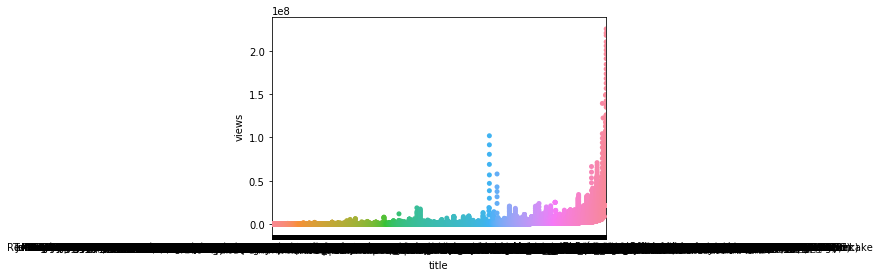

In [87]:

_= sns.swarmplot(x='title',y='views', data=d)


#### let's zoom in between 0.0 and 0.25 (0-25 million views) since the clustering is happening there.

In [12]:
data2 = d[(d.views<25000000)]

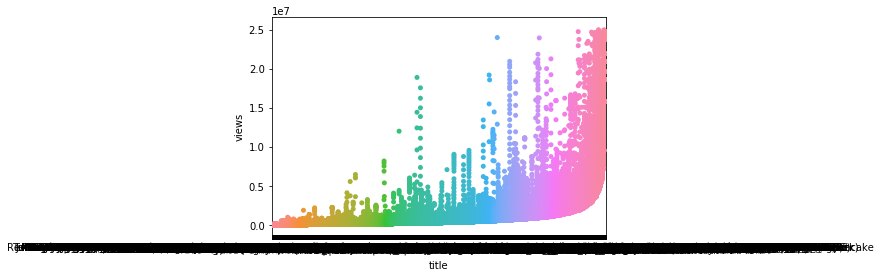

In [17]:
_= sns.swarmplot(x='title',y='views', data=data2)

#### let's zoom in more between 0.0 and 0.5 (0-5 million views) since the clustering is happening there.

In [18]:

data2 = d[(d.views<5000000)]

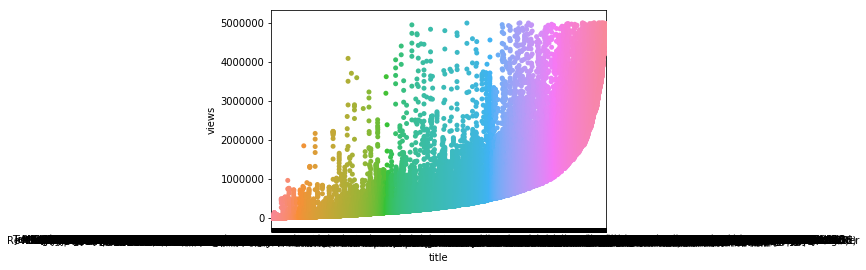

In [19]:
_= sns.swarmplot(x='title',y='views', data=data2)

let's do a distribution chart to make sure where the data is clustered exactly

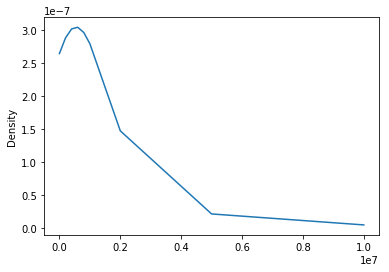

In [3]:
data["views"].plot.kde(ind=[0,200000,400000, 600000,800000, 1000000,2000000,5000000,10000000])

<div class="alert alert-block alert-success">

  <p>As shown in the graph most of the trending videos' views are around 1 million views.
</p>

</div> 




#### we will calculate the exact percentage of the trending videos under 1 million views.

In [20]:
(len(data[(data.views<1000000)]) / len(data)) *100

60.09426359618062

In [21]:
(len(data[(data.views<5000000)]) / len(data)) *100

90.81052040342865


<div class="alert alert-block alert-success">

  <p>Apparently around 60% of the trending videos are under 1 million views and around 91% of the videos are under 5 million views.
</p>

</div> 




<div class="alert alert-block alert-info">
<b>Analyzing the likes.</b>
</div>
<a id="5B"></a>

#### A graph between the video title and the number of likes.

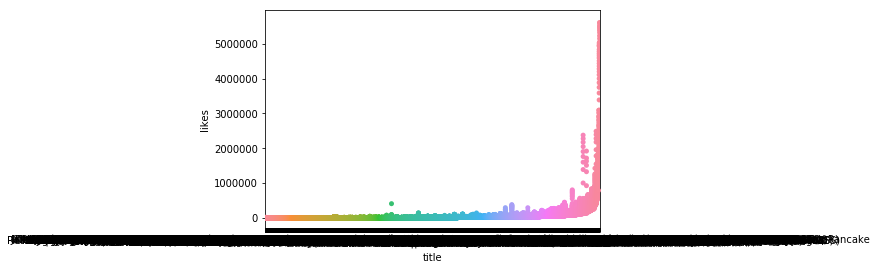

In [28]:
d=data.sort_values(by=['likes'], )
_= sns.swarmplot(x='title',y='likes', data=d)

#### Let's zoom in a little bit more in the clustered area (0-100,000 likes).

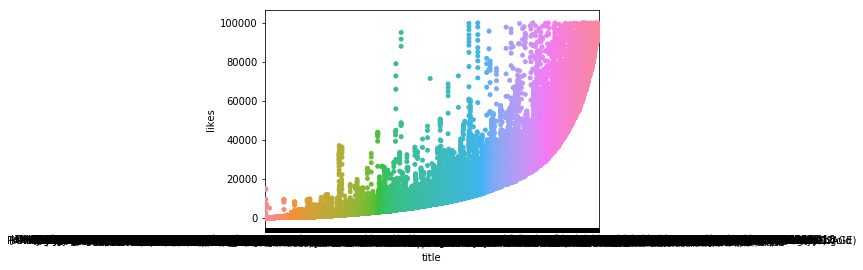

In [29]:
data2 = d[(d.likes<100000)]
_= sns.swarmplot(x='title',y='likes', data=data2)

let's do a distribution chart to make sure where the data is clustered exactly

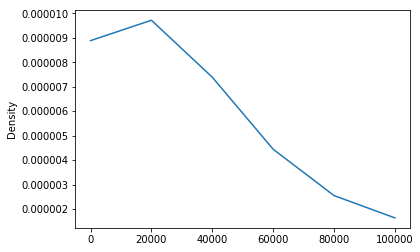

In [4]:
data["likes"].plot.kde(ind=[0,20000,40000, 60000,80000, 100000,])


<div class="alert alert-block alert-success">

  <p>
 As shown in the graph most of the trending videos' likes are in the range of 40000 likes.
</p>

</div> 




#### we will calculate the exact percentage of the trending videos under 40000 likes.

In [30]:
(len(data[(data.likes<40000)]) / len(data)) *100

68.4900730176561

In [31]:
(len(data[(data.likes<100000)]) / len(data)) *100

83.91657915944222


<div class="alert alert-block alert-success">

  <p>

Similarly around 68% of the trending videos are under 40 thousand likes and around 84% of the videos are under 100 thousand likes!
</p>

</div> 







<div class="alert alert-block alert-info">
<b>Analyzing the comments count.</b>
</div>
<a id="5C"></a>

#### A graph between the video title and the comment count.

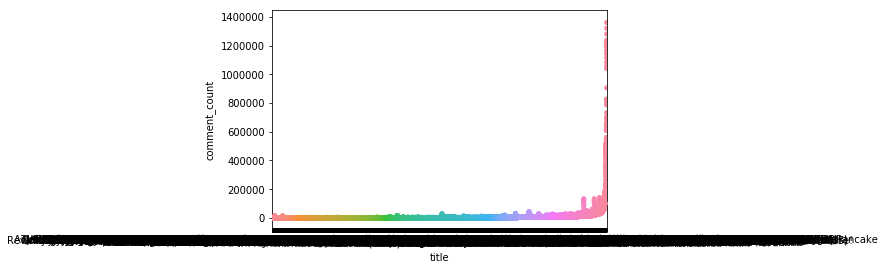

In [33]:
d=data.sort_values(by=['comment_count'], )
_= sns.swarmplot(x='title',y='comment_count', data=d)

let's do a distribution chart to make sure where the data is clustered 

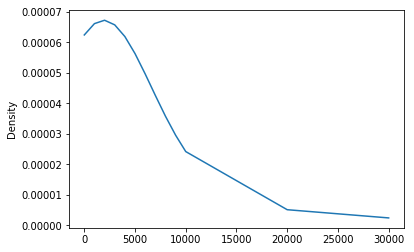

In [34]:
data["comment_count"].plot.kde(ind=[0,1000, 2000, 3000, 4000, 5000, 6000,7000,8000,9000,10000,20000,30000])

#### Let's zoom in a little bit more in the clustered area (0-10,000 likes) as shown in the two plots above.

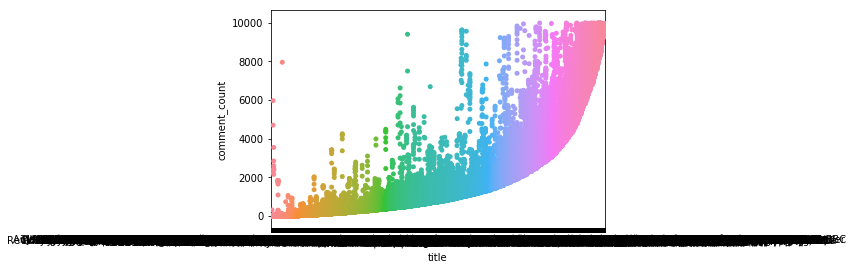

In [35]:
data2 = d[(d.comment_count<10000)]
_= sns.swarmplot(x='title',y='comment_count', data=data2)


<div class="alert alert-block alert-success">

  <p>


As shown in the graph most of the trending videos have a reange of 4000 comments.
</p>

</div> 






#### we will calculate the exact percentage of the trending videos under 4000 comments.

In [36]:
(len(data[(data.comment_count<4000)]) / len(data)) *100

67.48882756599673


<div class="alert alert-block alert-success">

  <p>





Around 67% of the trending videos have under 4 thousand comments.
</p>

</div> 




<div class="alert alert-block alert-info">
<b>Description on non-numerical columns.</b>
</div>
<a id="6"></a>

#### Some statistical information about the non-numerical columns of our data.

In [50]:
data.describe(include = ['O'])

,video_id,trending_date,title,channel_title,publish_time,tags,thumbnail_link,description
count,40949,40949,40949,40949,40949,40949,40949,40949
unique,6351,205,6455,2207,6269,6055,6352,6902
top,j4KvrAUjn6c,17.07.12,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,ESPN,2018-05-18T14:00:04.000Z,[none],https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,
freq,30,200,30,203,50,1535,30,570



<div class="alert alert-block alert-success">

   <p>&#9679; From the table, we can see that there are 205 unique dates, which means that our data contains collected data about trending videos over 205 days.</p>
    <p>&#9679; From the video_id column, we can see that there are 40949 videos, which is expected because our data contains 40949 records.</p>
    <p>&#9679; There are only 6351 unique videos which mean that some videos were trending videos many days.</p>
    <p>&#9679; We can see that the top frequent title is WE MADE OUR MOM CRY...HER DREAM CAME TRUE! and that it appeared 30 times.</p>
   <p>&#9679;  From the table above we can see that there are 6351 unique video IDs, but the number of titles is more than that number so one interpretation is that the trending video appeared many times in the list but in different titles. We can consider this reason for the description column. In addition, for the puplish_time column, the values are less than that number because two different videos may be published at the same time.
   <p/> </div> 


####  An example where a trending video appeared more than once as a trending video but with different titles.

In [52]:
grouped = data.groupby("video_id")
groups = []
final_group = []
for key, item in grouped:
    groups.append(grouped.get_group(key))

for i in groups:
    if len(i['title'].unique()) != 1:
        final_group.append(i)

print(final_group[0])

          video_id trending_date  \
14266  0ufNmUyf2co      18.26.01   
14491  0ufNmUyf2co      18.27.01   
14706  0ufNmUyf2co      18.28.01   
14931  0ufNmUyf2co      18.29.01   
15175  0ufNmUyf2co      18.30.01   
15385  0ufNmUyf2co      18.31.01   

                                                   title      channel_title  \
14266  Here are the weirdest bikes I own - Freak Bike...  Seth's Bike Hacks   
14491  Here are the weirdest bikes I own - Freak Bike...  Seth's Bike Hacks   
14706                        Bike Check - My freak bikes  Seth's Bike Hacks   
14931                        Bike Check - My freak bikes  Seth's Bike Hacks   
15175                        Bike Check - My freak bikes  Seth's Bike Hacks   
15385                        Bike Check - My freak bikes  Seth's Bike Hacks   

       category_id              publish_time  \
14266           26  2018-01-25T00:00:04.000Z   
14491           26  2018-01-25T00:00:04.000Z   
14706           26  2018-01-25T00:00:04.000Z   
1


<div class="alert alert-block alert-success">

   <p> We can see that this video appeared on the list with two different titles. <p/> </div> 



<div class="alert alert-block alert-info">
<b>Analyzing the titles.</b>
</div>
<a id="7"></a>

<div class="alert alert-block alert-info">
<b>How many titles contain capitalized word?</b>
</div>
<a id="7A"></a>

#### In this section we want to see how many titles have at least a capitalized word

In [43]:
def contains_capitalized_word(s):
    for w in s.split():
        if w.isupper():
            return True
    return False


data["contains_capitalized"] = data["title"].apply(contains_capitalized_word)
test=data['contains_capitalized'].value_counts()
test

False    22949
True     18000
Name: contains_capitalized, dtype: int64

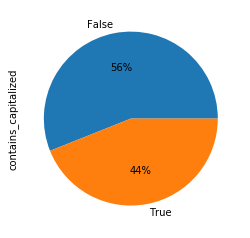

In [44]:
test.plot(kind='pie',autopct='%1.0f%%')


<div class="alert alert-block alert-success">

   <p> Around 44% of the titles actually have at least one capitalized word! <p/> </div> 




<div class="alert alert-block alert-info">
<b>Titles lengths.</b>
</div>
<a id="7B"></a>


#### In this section we want to check the lengths of the trendy titles and conclude a connection if possible.
#### That will be done by adding a new column of length to the dataframe and analysing it.

In [45]:
data["title_length"] = data["title"].apply(lambda x: len(x))

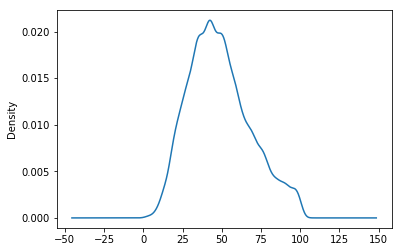

In [46]:
data["title_length"].plot(kind='density')



<div class="alert alert-block alert-success">

   <p>As shown in the graph above most of the titles are of a length between 30-60.
<p/> </div> 





#### Now let's analyse the length with the number of views


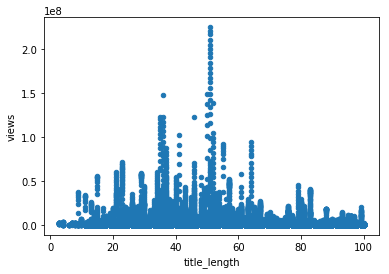

In [47]:
data.plot(x="title_length", y="views", kind='scatter')

 

<div class="alert alert-block alert-success">

   <p>As you can see there's no real connection between the length of the title and the views except when it comes to the outliers in the views their lengths are always between 30-35.

<p/> </div> 




<div class="alert alert-block alert-info">
<b>Most common words in video titles.</b>
</div>
<a id="7C"></a>


#### In this section we will search for the most common words in the titles and show the top 20 most used words

In [48]:
words = list(data["title"].apply(lambda x: x.split()))
words = [x for y in words for x in y]
df = pd.DataFrame({'col':words})
((df.col).value_counts()).head(30)

-            11452
|            10663
The           5762
the           3610
a             2566
to            2343
of            2338
in            2176
A             2122
&             2024
I             1940
and           1917
Video)        1901
Trailer       1868
How           1661
with          1655
2018          1613
(Official     1594
Official      1554
on            1552
To            1397
You           1254
My            1080
for           1020
ft.           1017
In             943
With           897
Is             828
at             826
What           773
Name: col, dtype: int64

 

<div class="alert alert-block alert-success">

   <p>
As you can see using words and symbols like { - , | , Video , Trailer , How , 2018 , Official } is really common in trendy videos.
<p/> </div> 




<div class="alert alert-block alert-info">
<b>Correlation between dataset variables.</b>
</div>
<a id="8"></a>

#### Now let's see how the dataset variables are correlated with each other: for example, we would like to see how views and likes are correlated, meaning do views and likes increase and decrease together (positive correlation)? Does one of them increase when the other decrease and vice versa (negative correlation)? Or are they not correlated?

In [49]:
data.corr()

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,contains_capitalized,title_length
category_id,1.000000,-0.168231,-0.173921,-0.033547,-0.076307,0.048949,-0.013506,-0.030011,0.064707,0.024199
views,-0.168231,1.000000,0.849177,0.472213,0.617621,0.002677,0.015355,-0.002256,-0.025441,-0.035612
likes,-0.173921,0.849177,1.000000,0.447186,0.803057,-0.028918,-0.020888,-0.002641,-0.002951,-0.078166
dislikes,-0.033547,0.472213,0.447186,1.000000,0.700184,-0.004431,-0.008230,-0.001853,-0.021672,-0.031235
comment_count,-0.076307,0.617621,0.803057,0.700184,1.000000,-0.028277,-0.013819,-0.003725,0.019825,-0.067043
comments_disabled,0.048949,0.002677,-0.028918,-0.004431,-0.028277,1.000000,0.319230,-0.002970,0.009074,0.026668
ratings_disabled,-0.013506,0.015355,-0.020888,-0.008230,-0.013819,0.319230,1.000000,-0.001526,0.000547,0.001442
video_error_or_removed,-0.030011,-0.002256,-0.002641,-0.001853,-0.003725,-0.002970,-0.001526,1.000000,-0.020995,-0.013833
contains_capitalized,0.064707,-0.025441,-0.002951,-0.021672,0.019825,0.009074,0.000547,-0.020995,1.000000,0.126671
title_length,0.024199,-0.035612,-0.078166,-0.031235,-0.067043,0.026668,0.001442,-0.013833,0.126671,1.000000



<div class="alert alert-block alert-success">

   <p>&#9679; We see for example that views and likes are highly positively correlated with a correlation value of 0.85; we see also a high positive correlation (0.80) between likes and comment count, and between dislikes and comment count (0.70).
 <p/>
 <p>&#9679; There is some positive correlation between views and dislikes, between views and comment count, between likes and dislikes.<p/>
 </div> 




#### visualize the correlation table.

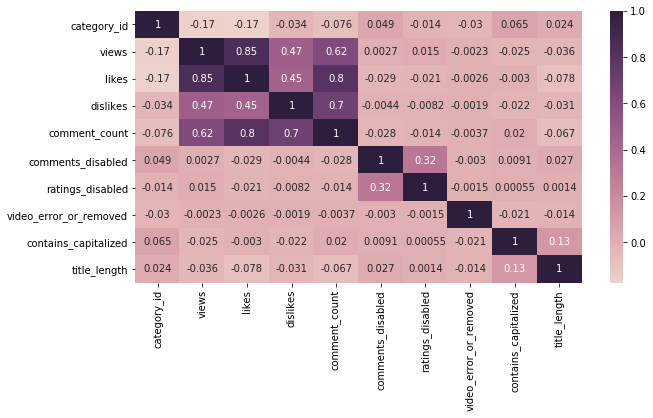

In [50]:
fig, ax = plt.subplots(figsize=(10,5))
_ = sns.heatmap(data.corr(), annot=True, xticklabels=data.corr().columns, yticklabels=data.corr().columns, 
    cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)


<div class="alert alert-block alert-success">

   <p>It is clear from the graph and from the table that views and likes are highly positively correlated. 
 <p/>
 </div> 





#### Display a plot between views and likes.

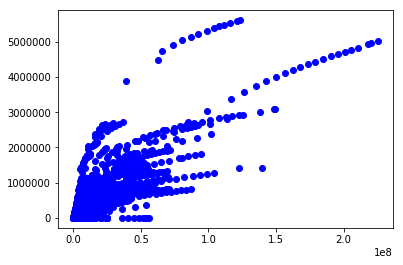

In [51]:
plt.plot(data['views'],data['likes'], 'ro',color='blue')
plt.show()


<div class="alert alert-block alert-success">

   <p>It is clear from the two graphs and from the table that views and likes are highly positively correlated. 
 <p/>
 </div> 





<div class="alert alert-block alert-info">
<b>Which channels have the largest number of trending videos?</b>
</div>
<a id="9"></a>

#### Top 20 channels that have the largest number of trending videos.

In [52]:
most_channel=data['channel_title'].value_counts()

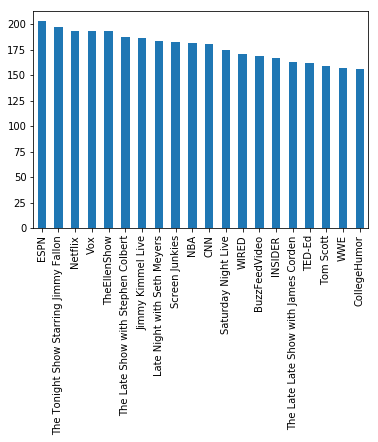

In [53]:
most_channel.head(20).plot.bar()

<div class="alert alert-block alert-info">
<b>Which video category has the largest number of trending videos?</b>
</div>
<a id="10"></a>

#### A bar plot of the categories with their number of trending videos

In [54]:
most_category_id=data['category_id'].value_counts()

In [55]:
id_to_category = {}
with open('Desktop/youtube/US_category_id.json', 'r') as f:
    data = json.load(f)
    for category in data['items']:
        id_to_category[category['id']] = category['snippet']['title']
print(id_to_category)

{'1': 'Film & Animation', '2': 'Autos & Vehicles', '10': 'Music', '15': 'Pets & Animals', '17': 'Sports', '18': 'Short Movies', '19': 'Travel & Events', '20': 'Gaming', '21': 'Videoblogging', '22': 'People & Blogs', '23': 'Comedy', '24': 'Entertainment', '25': 'News & Politics', '26': 'Howto & Style', '27': 'Education', '28': 'Science & Technology', '29': 'Nonprofits & Activism', '30': 'Movies', '31': 'Anime/Animation', '32': 'Action/Adventure', '33': 'Classics', '34': 'Comedy', '35': 'Documentary', '36': 'Drama', '37': 'Family', '38': 'Foreign', '39': 'Horror', '40': 'Sci-Fi/Fantasy', '41': 'Thriller', '42': 'Shorts', '43': 'Shows', '44': 'Trailers'}


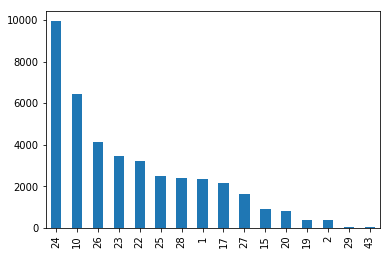

In [56]:
most_category_id.head(20).plot.bar()


<div class="alert alert-block alert-success">

   <p>We see that the Entertainment category (24) contains the largest number of trending videos among other categories: around 10,000 videos, followed by Music category (6) with around 6,200 videos, followed by Howto (2) & Style category (23) with around 4,100 videos, and so on.<p/>
 </div> 






<div class="alert alert-block alert-info">
<b>Analyzing the videos.</b>
</div>
<a id="11"></a>

#### Here we will be using diffrent features from video records and comparing them to each other to conclude if there are any relations between them.

<div class="alert alert-block alert-info">
<b>
Trending videos and their publishing time.</b>
</div>
<a id="11A"></a>

#### Here we will add two columns to represent the date and hour of publishing each video, then delete the original publish_time column because we will not need it anymore, just to make the data easier to read and understand.

In [61]:
data["publishing_day"] = data["publish_time"].apply(lambda x: datetime.datetime.strptime(x[:10], "%Y-%m-%d").date().strftime('%a'))

data["publishing_hour"] = data["publish_time"].apply(lambda x: x[11:13])
data.drop(labels='publish_time', axis=1, inplace=True)

#### Now we can see which days of the week had the largest numbers of trending videos.

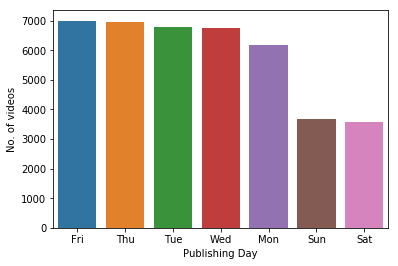

In [62]:
cdf = data["publishing_day"].value_counts()\
        .to_frame().reset_index().rename(columns={"index": "publishing_day", "publishing_day": "No_of_videos"})

fig, ax = plt.subplots()
_ = sns.barplot(x="publishing_day", y="No_of_videos", data=cdf, ax=ax)
_ = ax.set(xlabel="Publishing Day", ylabel="No. of videos")



<div class="alert alert-block alert-success">

   <p>It is clearly shown from the above graph that the number of trending videos published on Sunday and Saturday are noticeably less than the number of trending videos published on other days of the week.
<p/>
 </div> 








#### Now let's use publishing_hour column in the same way.

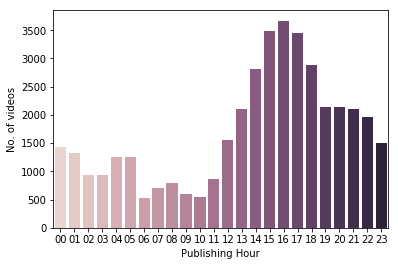

In [63]:
cdf = data["publishing_hour"].value_counts().to_frame().reset_index()\
        .rename(columns={"index": "publishing_hour", "publishing_hour": "No_of_videos"})

fig, ax = plt.subplots()
_ = sns.barplot(x="publishing_hour", y="No_of_videos", data=cdf, 
                palette=sns.cubehelix_palette(n_colors=24), ax=ax)
_ = ax.set(xlabel="Publishing Hour", ylabel="No. of videos")



<div class="alert alert-block alert-success">

   <p>

From the graph above we concure that the period between 2PM and 7PM, peaking between 4PM and 5PM, had the largest number of trending videos. We notice also that the period between 12AM and 1PM has the smallest number of trending videos. 
<p/>
 </div> 






<div class="alert alert-block alert-info">
<b>
How many trending videos have an error?</b>
</div>
<a id="11B"></a>

#### To see how many trending videos got removed or had some error, we can use video_error_or_removed column in the dataset.

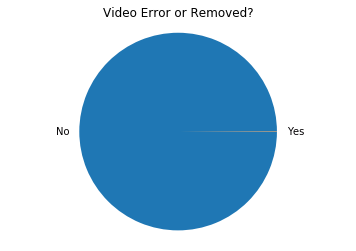

In [64]:
value_counts = data["video_error_or_removed"].value_counts().to_dict()

fig, ax = plt.subplots()
_ = ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
         textprops={'color': '#040204'})
_ = ax.axis('equal')
_ = ax.set_title('Video Error or Removed?')

In [65]:
data["video_error_or_removed"].value_counts()

False    40926
True        23
Name: video_error_or_removed, dtype: int64



<div class="alert alert-block alert-success">

   <p>
We can see that out of videos that appeared on trending list (40926 videos), there is a tiny portion (23 videos) with errors.
<p/>
 </div> 







<div class="alert alert-block alert-info">
<b>
How many trending videos have their commets disabled?</b>
</div>
<a id="11C"></a>

#### To know that, we use comments_disabled column.

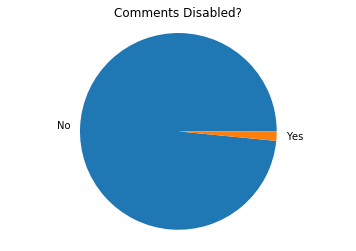

In [66]:
value_counts = data["comments_disabled"].value_counts().to_dict()

fig, ax = plt.subplots()
_ = ax.pie(x=[value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
            textprops={'color': '#040204'})
_ = ax.axis('equal')
_ = ax.set_title('Comments Disabled?')

In [67]:
data["comments_disabled"].value_counts(normalize=True)

False    0.984542
True     0.015458
Name: comments_disabled, dtype: float64



<div class="alert alert-block alert-success">

   <p>


We see that only 2% of trending videos prevented users from commenting.
<p/>
 </div> 






<div class="alert alert-block alert-info">
<b>
How many trending videos have their ratings disabled?</b>
</div>
<a id="11D"></a>

#### To know that, we use ratings_disabled column.

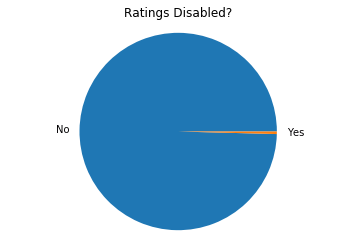

In [68]:
value_counts = data["ratings_disabled"].value_counts().to_dict()

fig, ax = plt.subplots()
_ = ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
             textprops={'color': '#040204'})
_ = ax.axis('equal')
_ = ax.set_title('Ratings Disabled?')

In [69]:
data["ratings_disabled"].value_counts()

False    40780
True       169
Name: ratings_disabled, dtype: int64



<div class="alert alert-block alert-success">

   <p>




We see that only 169 trending videos out of 40949 prevented users from commenting.
<p/>
 </div> 





<div class="alert alert-block alert-info">
<b>
How many videos have both comments and ratings disabled?</b>
</div>
<a id="11E"></a>

In [71]:
len(data[(data["comments_disabled"] == True) & (data["ratings_disabled"] == True)].index)

106



<div class="alert alert-block alert-success">

   <p>





So there are just 106 trending videos that have both comments and ratings disabled.
<p/>
 </div> 





<div class="alert alert-block alert-info">
<b>
Conclusions.</b>
</div>
<a id="12"></a>


<div class="alert alert-block alert-success">

   <p>&#9679;The data contain 40,949 records. We can see also that all columns are complete (they have 40,949 non-null records) except description column which has 570 null values, it only has 40,379 non-null values.</p>
    <p>&#9679; The average number of views of a trending video is 2,360,785. The median value for the number of views is 681,861, which means that half the trending videos have views that are less than that number, and the other half have views larger than that number.</p>
    <p>&#9679; The average number of likes of a trending video is 74,266, while the average number of dislikes is 3,711. The Average comment count is 8,446 while the median is 1,856<p/>
   <p>&#9679;There is a big difference between the mean and the median in all features, which means that there are outliers having big values. Because of these outliers, the mean became very big compared to the median.
<p/>
    <p>&#9679;Most of the trending videos' views are around 1 million views.<p/>
    <p>&#9679;Apparently around 60% of the trending videos are under 1 million views and around 91% of the videos are under 5 million views.<p/>
    <p>&#9679;Similarly around 68% of the trending videos are under 40 thousand likes and around 84% of the videos are under 100 thousand likes!<p/>
    <p>&#9679;Most of the trending videos have a reange of 4000 comments.<p/>
    <p>&#9679;Around 67% of the trending videos have under 4 thousand comments.<p/>
     <p>&#9679; There are 205 unique dates, which means that our data contains collected data about trending videos over 205 days.</p>
    <p>&#9679; There are 40949 videos, which is expected because our data contains 40949 records.</p>
    <p>&#9679; There are only 6351 unique videos which mean that some videos were trending videos many days.</p>
    <p>&#9679; The top frequent title is WE MADE OUR MOM CRY...HER DREAM CAME TRUE! and that it appeared 30 times.</p>
   <p>&#9679;  There are 6351 unique video IDs, but the number of titles is more than that number so one interpretation is that the trending video appeared many times in the list but in different titles. We can consider this reason for the description column. In addition, for the puplish_time column, the values are less than that number because two different videos may be published at the same time.
   <p/>
   <p>&#9679;Around 44% of the titles actually have at least one capitalized word!<p/>
    <p>&#9679;Most of the titles are of a length between 30-60.<p/>
    <p>&#9679;There's no real connection between the length of the title and the views except when it comes to the outliers in the views their lengths are always between 30-35.<p/>
    <p>&#9679;Using words and symbols like { - , | , Video , Trailer , How , 2018 , Official } is really common in trendy videos.<p/>
   
  <p>&#9679; Views and likes are highly positively correlated with a correlation value of (0.85); we see also a high positive correlation (0.80) between likes and comment count, and between dislikes and comment count (0.70).<p/>
    <p>&#9679; There is some positive correlation between views and dislikes, between views and comment count, between likes and dislikes.<p/>
       <p>&#9679; We see that the Entertainment category (24) contains the largest number of trending videos among other categories: around 10,000 videos, followed by Music category (6) with around 6,200 videos, followed by Howto (2) & Style category (23) with around 4,100 videos, and so on.<p/>
      <p>&#9679;The number of trending videos published on Sunday and Saturday are noticeably less than the number of trending videos published on other days of the week.<p/>
        <p>&#9679;The period between 2PM and 7PM, peaking between 4PM and 5PM, had the largest number of trending videos. We notice also that the period between 12AM and 1PM has the smallest number of trending videos.<p/>
          <p>&#9679;We found that out of videos that appeared on trending list (40926 videos), there is a tiny portion (23 videos) with errors.<p/>
            <p>&#9679;Only 2% of trending videos prevented users from commenting.<p/>
            
    
  <p>&#9679;Only 169 trending videos out of 40949 prevented users from commenting.<p/>
            
  <p>&#9679;There are just 106 trending videos that have both comments and ratings disabled.<p/>
            
   
   </div> 
